### DATA LOADING

In [25]:
import pandas as pd

In [26]:
# /Users/manasvi/Github/Customer-Complaint/Assignment/complaints-2021-05-14_08_16.json
import json
# load the json file
with open('/Users/manasvi/Github/Customer-Complaint/Assignment/complaints-2021-05-14_08_16.json', 'r') as f:
    data = json.load(f)

# convert the json file to a pandas dataframe
df = pd.DataFrame(data)
df

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0.0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0.0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0.0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0.0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0.0,"{'tags': None, 'zip_code': '10473', 'complaint..."
...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,"{'tags': None, 'zip_code': '08857', 'complaint..."
78309,complaint-public-v2,complaint,3091984,0.0,"{'tags': None, 'zip_code': '934XX', 'complaint..."
78310,complaint-public-v2,complaint,3133355,0.0,"{'tags': None, 'zip_code': '923XX', 'complaint..."
78311,complaint-public-v2,complaint,3110963,0.0,"{'tags': None, 'zip_code': None, 'complaint_id..."


In [27]:
df.columns


Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')

In [28]:
df['_source'].head()

0    {'tags': None, 'zip_code': '90301', 'complaint...
1    {'tags': 'Servicemember', 'zip_code': '319XX',...
2    {'tags': None, 'zip_code': '77069', 'complaint...
3    {'tags': None, 'zip_code': '48066', 'complaint...
4    {'tags': None, 'zip_code': '10473', 'complaint...
Name: _source, dtype: object

In [ ]:
# divide the _source column into multiple columns
df_source = pd.json_normalize(df['_source'])
df_source


,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


In [30]:
df = pd.concat([df,df_source],axis=1)
df.head()



,_index,_type,_id,_score,_source,tags,zip_code,complaint_id,issue,date_received,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,"{'tags': None, 'zip_code': '90301', 'complaint...",None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,"{'tags': 'Servicemember', 'zip_code': '319XX',...",Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,"{'tags': None, 'zip_code': '77069', 'complaint...",None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,"{'tags': None, 'zip_code': '48066', 'complaint...",None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,"{'tags': None, 'zip_code': '10473', 'complaint...",None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [32]:
df['product'].value_counts()

product
Mortgage                                                                        22725
Checking or savings account                                                     12147
Credit card or prepaid card                                                     10797
Credit card                                                                     10373
Bank account or service                                                          9816
Credit reporting, credit repair services, or other personal consumer reports     4310
Debt collection                                                                  3201
Money transfer, virtual currency, or money service                               1500
Consumer Loan                                                                    1029
Vehicle loan or lease                                                             892
Student loan                                                                      866
Money transfers                               

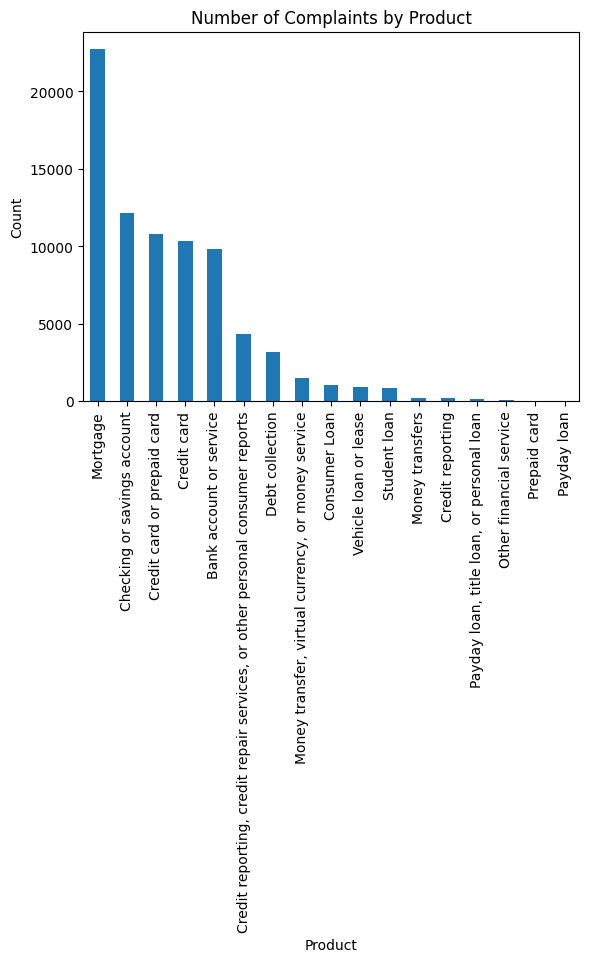

In [ ]:
from matplotlib import pyplot as plt
df['product'].value_counts().plot(kind='bar')
plt.title('Number of Complaints by Product')
plt.ylabel('Count'); plt.xlabel('Product'); plt.show()

In [33]:
# df['complaint_what_happened'].unique

#check missing values in complaint_what_happened
df['complaint_what_happened'].isnull().sum()

#fill missing values with empty string
df['complaint_what_happened'] = df['complaint_what_happened'].fillna('')



### Text preprocessing

In [35]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manasvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/manasvi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/manasvi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
# Function to clean the text
def clean_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    return text

# Function to Lemmatize the text
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return " ".join(words)

import string

# Apply cleaning
df['clean_complaints'] = df['complaint_what_happened'].apply(clean_text)
df['clean_complaints'] = df['clean_complaints'].apply(lemmatize_text)

print(df['clean_complaints'].head())

0                                                     
1    good morning name xxxx xxxx appreciate could h...
2    upgraded xxxx xxxx card told agent upgrade ann...
3                                                     
4                                                     
Name: clean_complaints, dtype: object


### EDA

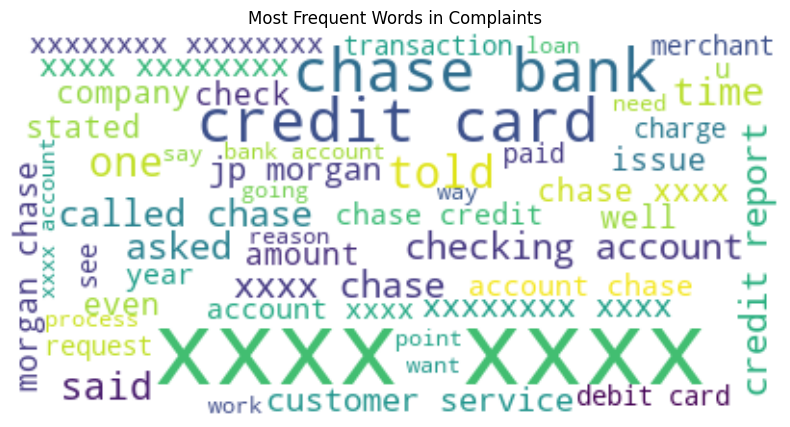

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualize the most frequent words using a WordCloud
text = " ".join(complaint for complaint in df['clean_complaints'])
wordcloud = WordCloud(background_color="white", max_words=50).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Complaints")
plt.show()

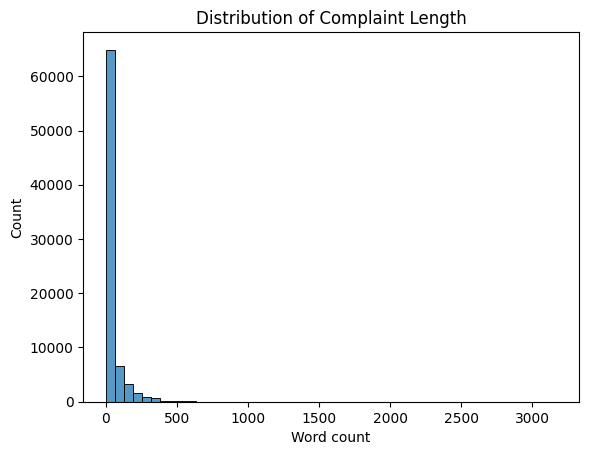

In [ ]:
import seaborn as sns

df['text_len'] = df['clean_complaints'].str.split().str.len()
sns.histplot(df['text_len'], bins=50)
plt.title('Distribution of Complaint Length'); plt.xlabel('Word count'); plt.show()

/var/folders/gz/_06zqnfd5hb8j46f9jktvrmh0000gn/T/ipykernel_12140/940490054.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='unigram', y='count', data=df1, palette='viridis')


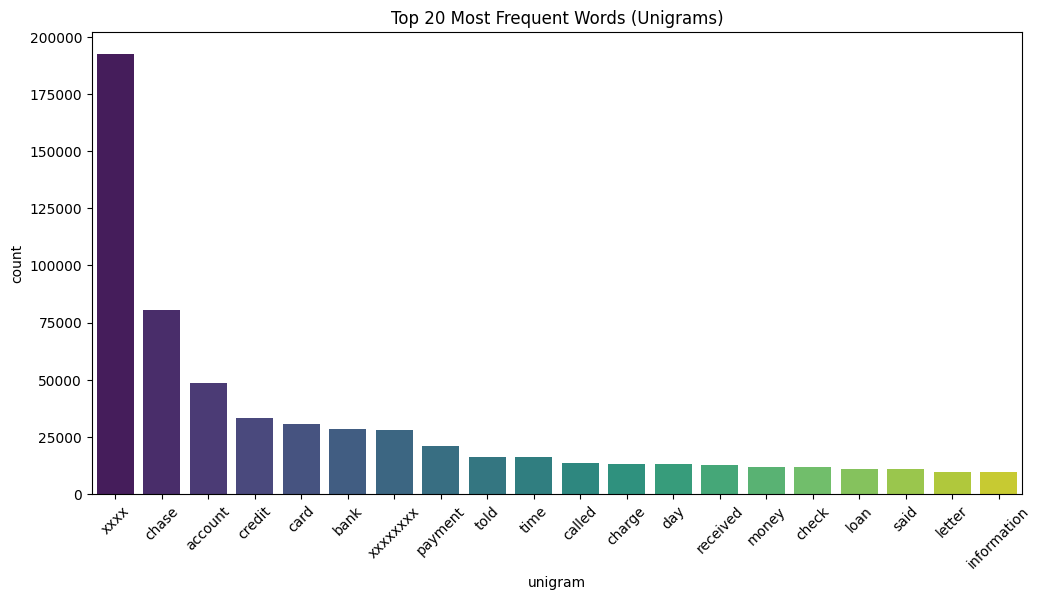

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    # Initialize CountVectorizer (excluding standard English stop words)
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 words
common_words = get_top_n_words(df['clean_complaints'], 20)
df1 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='unigram', y='count', data=df1, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words (Unigrams)')
plt.show()

/var/folders/gz/_06zqnfd5hb8j46f9jktvrmh0000gn/T/ipykernel_12140/1461169403.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bigram', y='count', data=df2, palette='magma')


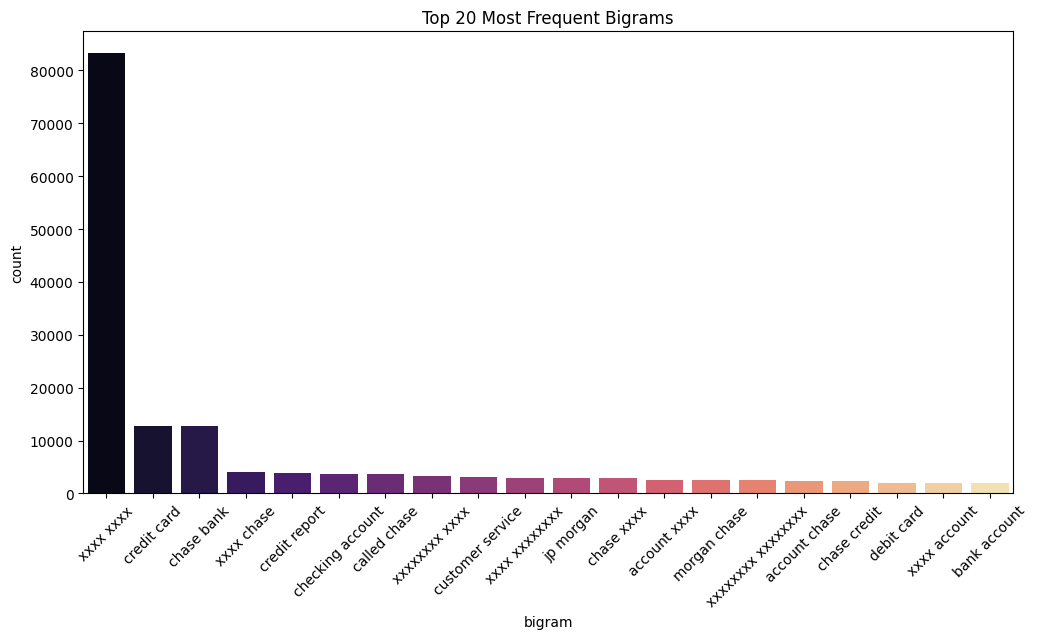

In [41]:
def get_top_n_bigrams(corpus, n=None):
    # n_gram_range=(2,2) restricts it to phrases of exactly 2 words
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 bigrams
common_words = get_top_n_bigrams(df['clean_complaints'], 20)
df2 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='bigram', y='count', data=df2, palette='magma')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Bigrams')
plt.show()

### Feature extraction

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# min_df=2 means ignore terms that appear in less than 2 documents
# max_df=0.95 means ignore terms that appear in more than 95% of documents
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Create the Document-Term Matrix (DTM)
dtm = tfidf.fit_transform(df['clean_complaints'])

print(f"DTM Shape: {dtm.shape}")

DTM Shape: (78313, 14214)


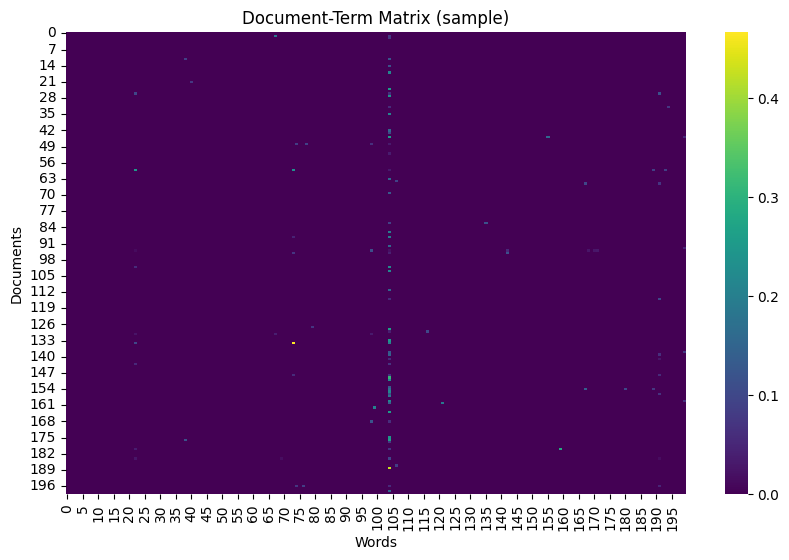

In [43]:
# Example: first 200 docs × first 200 terms
sample_dtm = dtm[:200, :200].toarray()
plt.figure(figsize=(10, 6))
sns.heatmap(sample_dtm, cmap='viridis', annot=False, cbar=True)
plt.title('Document-Term Matrix (sample)')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()

### Topic modelling using NMF

In [44]:
from sklearn.decomposition import NMF
import numpy as np
# Load NMF model with 5 components (topics)
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=40)

# Fit the model to the TF-IDF data
W = nmf_model.fit_transform(dtm)  # Document-Topic Matrix
H = nmf_model.components_         # Topic-Term Matrix

# Display the top 15 words for each topic to manually label them
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i}' for i in range(num_topics)],
                           columns=[f'Word {i}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

print(topic_words)

          Word 0    Word 1    Word 2   Word 3   Word 4       Word 5    Word 6  \
Topic 0     xxxx      bank    number     debt    money         help   company   
Topic 1  account      bank     chase    check    money       closed      fund   
Topic 2   credit      card    report  inquiry    chase      account     score   
Topic 3  payment      loan  mortgage    chase     late        month       pay   
Topic 4    chase  xxxxxxxx    charge     card  dispute  transaction  received   

            Word 7   Word 8 Word 9       Word 10 Word 11   Word 12   Word 13  \
Topic 0  complaint    chase   sent  xxxxxxxxxxxx  morgan      said      home   
Topic 1   checking  deposit   told           day  branch       fee      open   
Topic 2    balance  company   hard     reporting   limit   applied    closed   
Topic 3       time     paid   year  modification    home  xxxxxxxx   balance   
Topic 4      claim   called   told        letter   fraud      time  merchant   

        Word 14  
Topic 0      j

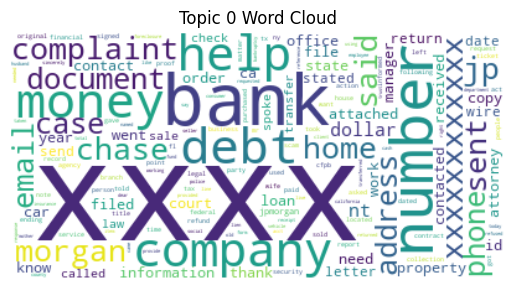

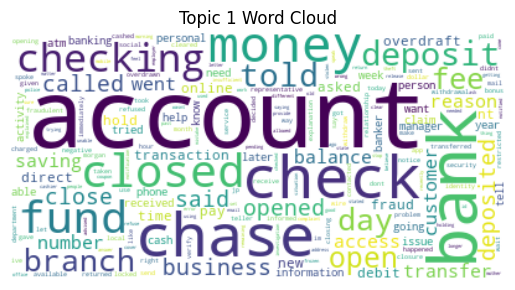

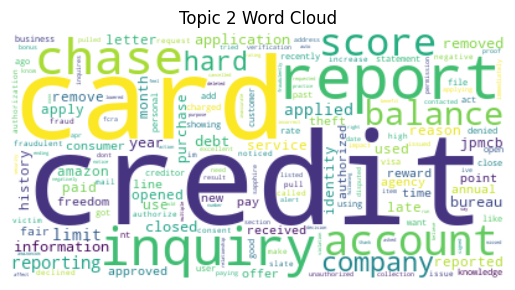

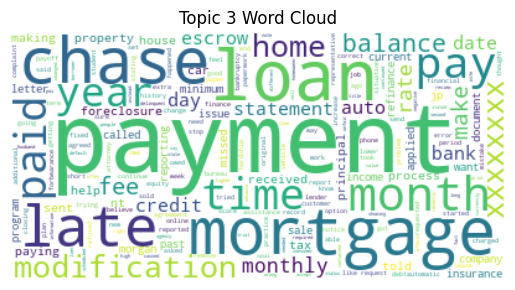

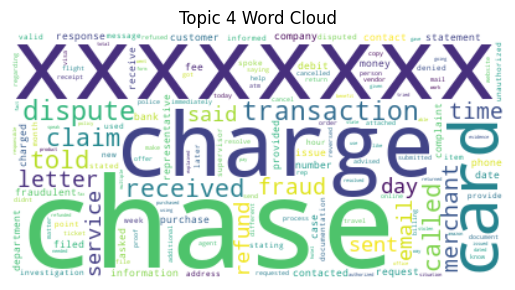

In [45]:
from wordcloud import WordCloud

for i in range(num_topics):
    weights = H[i]
    word_scores = dict(zip(words, weights))
    wc = WordCloud(background_color='white').generate_from_frequencies(word_scores)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i} Word Cloud')
    plt.show()

In [ ]:
# Assign the best fitting topic to each complaint
topic_results = nmf_model.transform(dtm)
df['Topic'] = topic_results.argmax(axis=1)

# MAPPING DICTIONARY

topic_mapping = {
    0: 'Others',
    1: 'Bank account services',
    2: 'Credit card / Prepaid card',
    3: 'Mortgages/loans',
    4: 'Theft/Dispute reporting'
}

df['Category'] = df['Topic'].map(topic_mapping)
print(df[['clean_complaints', 'Category']].head())

                                    clean_complaints Category
0                                                      Others
1  good morning name xxxx xxxx appreciate could h...   Others
2  upgraded xxxx xxxx card told agent upgrade ann...   Others
3                                                      Others
4                                                      Others


In [20]:
df[['clean_complaints', 'Category']]


,clean_complaints,Category
0,,Others
1,good morning name xxxx xxxx appreciate could h...,Others
2,upgraded xxxx xxxx card told agent upgrade ann...,Others
3,,Others
4,,Others
...,...,...
78308,,Others
78309,wednesday xxxxxxxx called chas xxxx xxxx visa ...,Theft/Dispute reporting
78310,familiar xxxx pay understand great risk provid...,Theft/Dispute reporting
78311,flawless credit yr ive chase credit card chase...,Mortgages/loans


### MODEL BUILDING AND TRAINING

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features (X) are the TF-IDF vectors
X = dtm
# Target (y) are the Topic indices (0-4)
y = df['Topic']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize and train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### INFERENCE

In [22]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[topic_mapping[i] for i in range(num_topics)]))

Accuracy: 0.980399668007406

Classification Report:

                            precision    recall  f1-score   support

                    Others       0.99      0.99      0.99     12641
     Bank account services       0.96      0.94      0.95       855
Credit card / Prepaid card       0.96      0.94      0.95       729
           Mortgages/loans       0.95      0.93      0.94       652
   Theft/Dispute reporting       0.94      0.87      0.91       786

                  accuracy                           0.98     15663
                 macro avg       0.96      0.94      0.95     15663
              weighted avg       0.98      0.98      0.98     15663



In [23]:
def predict_complaint_category(text):
    # 1. Clean the text
    clean = clean_text(text)
    clean = lemmatize_text(clean)
    
    # 2. Transform using the existing TF-IDF vectorizer
    text_vec = tfidf.transform([clean])
    
    # 3. Predict using the Logistic Regression model
    topic_num = clf.predict(text_vec)[0]
    
    # 4. Map to category name
    return topic_mapping[topic_num]

# Test with a new complaint
new_complaint = "I have been trying to refinance my house but the rates are too high and the process is slow."
category = predict_complaint_category(new_complaint)

print(f"Complaint: {new_complaint}")
print(f"Predicted Department: {category}")

Complaint: I have been trying to refinance my house but the rates are too high and the process is slow.
Predicted Department: Mortgages/loans


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm, df['Topic'], test_size=0.2, random_state=40)

dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[topic_mapping[i] for i in range(num_topics)]))

Accuracy: 0.9431143459107451

Classification Report:

                            precision    recall  f1-score   support

                    Others       0.98      0.99      0.98     12641
     Bank account services       0.80      0.82      0.81       855
Credit card / Prepaid card       0.79      0.80      0.80       729
           Mortgages/loans       0.81      0.79      0.80       652
   Theft/Dispute reporting       0.68      0.64      0.66       786

                  accuracy                           0.94     15663
                 macro avg       0.81      0.81      0.81     15663
              weighted avg       0.94      0.94      0.94     15663

